# Trabajo Práctico: Procesamiento de datos

En la carpeta `data` se encuentra los datos crudos de ventas durante el 2022 de las diferentes sedes de una cadeda de tiendas DuttyFree ubicadas en distintos aeropuertos del país. Esta información se encuentra en distintos archivos en formato `.parquet` los cuales deben ser reconstruidos. La compañía desea analizar los datos para apoyar su proceso de toma de decisiones. Sin embargo, estos datos son recolectados manualmente desde cada una de las sedes por lo que se requiere previamente realizar una limpieza y procesamiento de los datos.

## Carga de configuraciones:

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import os
import numpy as np
import datetime
import seaborn as sns
pd.options.display.float_format = '{:,}'.format
#pd.set_option('max_columns', 50)

## Reconstrucción de los datos

Para manejar datos de archivos `.parquet` se requiere tener instalado uno de los siguientes paquetes: `pyarrow` o `fastparquet`. Para instalarlos, ejecute alguno de los siguientes comandos:

```
!pip install pyarrow
!pip install fastparquet
```

Lea y reconstruya los datos unificandolos en un mismo DataFrame. Luego, conteste las siguientes preguntas:

1. ¿Cuántos registros tienen los datos?
2. ¿Cuántas columnas tienen los datos?
3. De una breve explicación de los datos que contiene cada columna.
4. ¿Existe alguna columna que contenga un 'identificador único'? ¿Existen registros duplicados en este campo?
5. Haga un recuento de valores para cada columna categórica. ¿Existen valores con un mismo significado?

In [2]:
salesfiles = os.listdir('data/')
salesList = []
dfSales = pd.DataFrame()
for f in salesfiles:
    salesList.append(pd.read_parquet('data/'+ f))
    
dfSales = pd.concat((salesList), ignore_index = True)

## Columnas

In [3]:
dfSales.columns.tolist()

['id_tienda',
 'nombre_tienda',
 'sigla',
 'aeropuerto',
 'latitud',
 'longitud',
 'ciudad',
 'region',
 'id_compra',
 'moneda',
 'monto',
 'tipo_viaje',
 'tipo_transito',
 'nacionalidad',
 'fecha',
 'hora',
 'minuto',
 'medio_pago',
 'franquicia_tdc',
 'porcentaje_iva',
 'monto_iva',
 'lleva_bolsa_plastica',
 'lleva_alcohol',
 'lleva_tabaco',
 'lleva_libros',
 'monto_pagado',
 'monto_pagado_cop',
 'monto_pagado_usd',
 'monto_pagado_eur']

In [4]:
dfSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781632 entries, 0 to 781631
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id_tienda             781632 non-null  int32         
 1   nombre_tienda         781632 non-null  object        
 2   sigla                 781632 non-null  object        
 3   aeropuerto            781632 non-null  object        
 4   latitud               781632 non-null  float64       
 5   longitud              781632 non-null  float64       
 6   ciudad                781632 non-null  object        
 7   region                781632 non-null  object        
 8   id_compra             781632 non-null  int32         
 9   moneda                781632 non-null  object        
 10  monto                 781632 non-null  float64       
 11  tipo_viaje            781632 non-null  object        
 12  tipo_transito         781632 non-null  object        
 13 

## Data Frame

In [5]:
dfSales

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,...,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,monto_pagado,monto_pagado_cop,monto_pagado_usd,monto_pagado_eur
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,...,0.19,5.369400000000001,1.0,1.0,NaN,NaN,EUR 28.26,NaN,NaN,28.26
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,pesos colombianos,...,NaN,NaN,NaN,NaN,NaN,NaN,pesos colombianos 321300.0,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,pesos colombianos,...,0.19,"9,158.0",1.0,0.0,NaN,1.0,pesos colombianos 48200.0,NaN,NaN,NaN
3,300,DutyFree Paisa,PEI,Matecaña,4.8158,-75.73637,Pereira,Eje Cafetero,637092,dolares americanos,...,0.19,19.2888,1.0,1.0,NaN,0.0,dolares americanos 101.52,NaN,NaN,NaN
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,euros,...,0.19,51.8301,0.0,NaN,1.0,NaN,euros 272.79,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.1716,-75.42775,Rionegro,Eje Cafetero,9683054,euros,...,NaN,NaN,1.0,NaN,1.0,1.0,euros 115.17,NaN,NaN,NaN
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.5164,Cartagena,Costa,5190273,dolares americanos,...,NaN,NaN,1.0,0.0,0.0,NaN,dolares americanos 264.71,NaN,NaN,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,euros,...,0.19,38.9025,1.0,1.0,1.0,1.0,euros 204.75,NaN,NaN,NaN
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,dolares americanos,...,0.19,24.7551,NaN,0.0,1.0,NaN,dolares americanos 130.29,NaN,NaN,NaN


## Celdas Ocultas

In [6]:
hidenCells = pd.DataFrame(dfSales, columns=[
    'monto',
    'tipo_viaje',
    'tipo_transito',
    'nacionalidad',
    'fecha',
    'hora',
    'minuto',
    'medio_pago',
    'franquicia_tdc',
])
hidenCells

,monto,tipo_viaje,tipo_transito,nacionalidad,fecha,hora,minuto,medio_pago,franquicia_tdc
0,28.26,Nacional,Arrival,Extranjera,2022-02-03,2,5,TDC,Mastercard
1,"321,300.0",Internacional,Arrival,Colombiana,2022-04-02,11,9,Efectivo,None
2,"48,200.0",Local,Departure,Colombiana,2022-06-26,5,57,Tarjeta,MCD
3,101.52,Local,Departure,Colombiana,2022-10-02,17,6,TDC,VISA
4,272.79,Nacional,Departure,Extranjera,2022-03-03,3,7,TDC,AMEX
...,...,...,...,...,...,...,...,...,...
781627,115.17,Internacional,Salida,Extranjera,2022-08-04,8,32,Efectivo,None
781628,264.71,Internacional,Salida,Colombiana,2022-07-23,15,47,Tarjeta,Mastercard
781629,204.75,Nacional,Arrival,Colombiana,2022-02-15,21,13,Cash,None
781630,130.29,Nacional,Departure,Extranjera,2022-05-09,16,3,Tarjeta,AMEX


## 1. y 2. Registros y columnas del dataframe:

In [7]:
print ('Las dimensiones de los datos son (filas,columnas)',dfSales.shape)

Las dimensiones de los datos son (filas,columnas) (781632, 29)


## 3. Breve explicación de los datos

-id_tienda: Indice de la tienda.

-nombre_tienda: Nombre tienda.

-sigla: Sigla del aeropuerto.

-aeropuerto: Nombre del aeropuerto.

-latitud: latitud de coordenadas.

-longitud: logitud de coordenadas.

-ciudad: ciudad donde está ubicado el aeropueto en el que está la tienda.

## 4. Columna con identificador único

Se tienen dos columnas con identificador: id_tienda, la cual hace referencia al identificador único de cada tienda y id_compra, que hace referencia al id único generado para venta realizada.

El campo id_tienda contiene campos repetidos en el dataframe, lo cual es esperado ya que cada tienda puede realizar muchas ventas.

Por otro lado, la columna id_compra no cuenta con campos repetidos (la cantidad de id's únicos es igual al total de registros (781.632), esto es esperado ya que al cada compra ser única, solo debe existir un id a través del cual se pueda referenciar. Es decir, no se pueden tener dos o más compras con el mismo id_compra.

In [8]:
# Información de id_tienda

dfSales[['id_tienda']].value_counts()

id_tienda
900          78789
1000         78507
400          78393
600          78336
500          78188
700          78067
200          78018
800          77974
100          77949
300          77411
dtype: int64

In [9]:
# Información de id_compra

dfSales[['id_compra']].value_counts()

id_compra
6            1
6666248      1
6666138      1
6666155      1
6666162      1
            ..
3330172      1
3330226      1
3330231      1
3330239      1
9999986      1
Length: 781632, dtype: int64

## 5.1 Valores con el mismo significado

Se tienen varias columnas relacionadas a las monedas y montos de las ventas: ('moneda','monto','monto_pagado','monto_pagado_cop','monto_pagado_usd','monto_pagado_eur') el detalle de cada una está en el numeral 3.

Tras analizar detalladamente esta sección de los datos, podemos identificar que los únicos campos que están completos para cada venta son los de 'moneda' y 'monto'. Esto se comprueba a través del filtro de no nulos, es decir, el resultado de cantidad de registros tras filtrar los no nulos debe ser igual al total de ventas registradas. Para las columnas de 'monto_pagado_cop','monto_pagado_usd','monto_pagado_eur' esto no se cumple, ya que hay ventas registradas por ejemplo en COP que no tienen el valor en la columna monto_pagado_cop.

También se puede excluir la columna monto_pagado, ya que es simplemente una concatenación de las columnas 'moneda' y 'monto'.

In [10]:
## Sección solo de monedas
monedas = pd.DataFrame(dfSales, columns=[
    'moneda',
    'monto',
    'monto_pagado',
    'monto_pagado_cop',
    'monto_pagado_usd',
    'monto_pagado_eur'
])
monedas

,moneda,monto,monto_pagado,monto_pagado_cop,monto_pagado_usd,monto_pagado_eur
0,EUR,28.26,EUR 28.26,NaN,NaN,28.26
1,pesos colombianos,"321,300.0",pesos colombianos 321300.0,NaN,NaN,NaN
2,pesos colombianos,"48,200.0",pesos colombianos 48200.0,NaN,NaN,NaN
3,dolares americanos,101.52,dolares americanos 101.52,NaN,NaN,NaN
4,euros,272.79,euros 272.79,NaN,NaN,NaN
...,...,...,...,...,...,...
781627,euros,115.17,euros 115.17,NaN,NaN,NaN
781628,dolares americanos,264.71,dolares americanos 264.71,NaN,NaN,NaN
781629,euros,204.75,euros 204.75,NaN,NaN,NaN
781630,dolares americanos,130.29,dolares americanos 130.29,NaN,NaN,NaN


In [11]:
## Sección no nulos columna moneda
dfSales[dfSales['moneda'].notna()]

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,...,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,monto_pagado,monto_pagado_cop,monto_pagado_usd,monto_pagado_eur
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,...,0.19,5.369400000000001,1.0,1.0,NaN,NaN,EUR 28.26,NaN,NaN,28.26
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,pesos colombianos,...,NaN,NaN,NaN,NaN,NaN,NaN,pesos colombianos 321300.0,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,pesos colombianos,...,0.19,"9,158.0",1.0,0.0,NaN,1.0,pesos colombianos 48200.0,NaN,NaN,NaN
3,300,DutyFree Paisa,PEI,Matecaña,4.8158,-75.73637,Pereira,Eje Cafetero,637092,dolares americanos,...,0.19,19.2888,1.0,1.0,NaN,0.0,dolares americanos 101.52,NaN,NaN,NaN
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,euros,...,0.19,51.8301,0.0,NaN,1.0,NaN,euros 272.79,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.1716,-75.42775,Rionegro,Eje Cafetero,9683054,euros,...,NaN,NaN,1.0,NaN,1.0,1.0,euros 115.17,NaN,NaN,NaN
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.5164,Cartagena,Costa,5190273,dolares americanos,...,NaN,NaN,1.0,0.0,0.0,NaN,dolares americanos 264.71,NaN,NaN,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,euros,...,0.19,38.9025,1.0,1.0,1.0,1.0,euros 204.75,NaN,NaN,NaN
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,dolares americanos,...,0.19,24.7551,NaN,0.0,1.0,NaN,dolares americanos 130.29,NaN,NaN,NaN


In [12]:
## Sección no nulos columna monto
dfSales[dfSales['monto'].notna()]

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,...,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,monto_pagado,monto_pagado_cop,monto_pagado_usd,monto_pagado_eur
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,...,0.19,5.369400000000001,1.0,1.0,NaN,NaN,EUR 28.26,NaN,NaN,28.26
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,pesos colombianos,...,NaN,NaN,NaN,NaN,NaN,NaN,pesos colombianos 321300.0,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,pesos colombianos,...,0.19,"9,158.0",1.0,0.0,NaN,1.0,pesos colombianos 48200.0,NaN,NaN,NaN
3,300,DutyFree Paisa,PEI,Matecaña,4.8158,-75.73637,Pereira,Eje Cafetero,637092,dolares americanos,...,0.19,19.2888,1.0,1.0,NaN,0.0,dolares americanos 101.52,NaN,NaN,NaN
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,euros,...,0.19,51.8301,0.0,NaN,1.0,NaN,euros 272.79,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.1716,-75.42775,Rionegro,Eje Cafetero,9683054,euros,...,NaN,NaN,1.0,NaN,1.0,1.0,euros 115.17,NaN,NaN,NaN
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.5164,Cartagena,Costa,5190273,dolares americanos,...,NaN,NaN,1.0,0.0,0.0,NaN,dolares americanos 264.71,NaN,NaN,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,euros,...,0.19,38.9025,1.0,1.0,1.0,1.0,euros 204.75,NaN,NaN,NaN
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,dolares americanos,...,0.19,24.7551,NaN,0.0,1.0,NaN,dolares americanos 130.29,NaN,NaN,NaN


## 5.2 Columnas que contienen valores con significados duplicados

Como se verá a continuación, las columnas que se pueden consolidar son:

-moneda

-tipo_viaje

-tipo_transito

-medio_pago

-franquicia_tdc

In [13]:
## nombre_tienda
dfSales[['nombre_tienda']].value_counts()

nombre_tienda      
DutyFree Costero       235270
DutyFree Paisa         155360
DutyFree Mira Ve        78393
DutyFree Capital        78336
DutyFree Galeras        78188
DutyFree Pijao          78067
DutyFree Manizalita     78018
dtype: int64

In [14]:
## sigla
dfSales[['sigla']].value_counts()

sigla
BAQ      78789
SMR      78507
CLO      78393
BOG      78336
PSO      78188
IBE      78067
MZL      78018
CTG      77974
MDE      77949
PEI      77411
dtype: int64

In [15]:
## aeropuerto
dfSales[['aeropuerto']].value_counts()

aeropuerto            
Ernesto Cortissoz         78789
Simon Bolivar             78507
Alfonso Bonilla Aragon    78393
El Dorado                 78336
Antonio Narino            78188
Perales                   78067
La Nubia                  78018
Rafael Nunez              77974
Jose Maria Cordoba        77949
Matecaña                  77411
dtype: int64

In [16]:
## ciudad
dfSales[['ciudad']].value_counts()

ciudad      
Barranquilla    78789
Santa Marta     78507
Palmira         78393
Bogota          78336
Pasto           78188
Ibague          78067
Manizales       78018
Cartagena       77974
Rionegro        77949
Pereira         77411
dtype: int64

In [17]:
## region
dfSales[['region']].value_counts()

region      
Costa           235270
Eje Cafetero    233378
Sur             156581
Centro          156403
dtype: int64

In [18]:
## moneda
dfSales[['moneda']].value_counts()

moneda            
USD                   130678
euros                 130398
EUR                   130241
dolares americanos    130185
COP                   130155
pesos colombianos     129975
dtype: int64

In [19]:
## tipo_viaje
dfSales[['tipo_viaje']].value_counts()

tipo_viaje   
Local            260734
Nacional         260712
Internacional    260186
dtype: int64

In [20]:
## tipo_transito
dfSales[['tipo_transito']].value_counts()

tipo_transito
Salida           195931
Llegada          195408
Arrival          195239
Departure        195054
dtype: int64

In [21]:
## nacionalidad
dfSales[['nacionalidad']].value_counts()

nacionalidad
Extranjera      391356
Colombiana      390276
dtype: int64

In [22]:
## medio_pago
dfSales[['medio_pago']].value_counts()

medio_pago
TDC           195892
Efectivo      195649
Cash          195098
Tarjeta       194993
dtype: int64

In [23]:
## franquicia_tdc
dfSales[['franquicia_tdc']].value_counts()

franquicia_tdc  
AMEX                78424
Mastercard          78406
VISA                78262
MCD                 77955
American Express    77838
dtype: int64

## Manipulación de datos

Luego de reconstruir y analizar los datos, se identificaron opciones de mejorar la calidad de los datos. Realice:

1. Elimine columnas que contengan datos duplicados.
2. Para las columnas categóricas, unifique los valores con significados duplicados.

## 1. Columnas a eliminar

In [24]:
dfSales = dfSales.drop(['monto_pagado_cop','monto_pagado_usd','monto_pagado_eur','monto_pagado'], axis = 1)
dfSales.columns.tolist()

['id_tienda',
 'nombre_tienda',
 'sigla',
 'aeropuerto',
 'latitud',
 'longitud',
 'ciudad',
 'region',
 'id_compra',
 'moneda',
 'monto',
 'tipo_viaje',
 'tipo_transito',
 'nacionalidad',
 'fecha',
 'hora',
 'minuto',
 'medio_pago',
 'franquicia_tdc',
 'porcentaje_iva',
 'monto_iva',
 'lleva_bolsa_plastica',
 'lleva_alcohol',
 'lleva_tabaco',
 'lleva_libros']

## 2. Datos a modificar

In [25]:
# moneda
dfSales.moneda = dfSales.moneda.replace(['dolares americanos','euros','pesos colombianos'],['USD', 'EUR', 'COP'])
dfSales[['moneda']].value_counts()

moneda
USD       260863
EUR       260639
COP       260130
dtype: int64

In [26]:
# tipo_viaje
dfSales.tipo_viaje = dfSales.tipo_viaje.replace('Local','Nacional')
dfSales[['tipo_viaje']].value_counts()

tipo_viaje   
Nacional         521446
Internacional    260186
dtype: int64

In [27]:
# tipo_transito
dfSales.tipo_transito = dfSales.tipo_transito.replace(['Arrival','Departure'],['Llegada', 'Salida'])
dfSales[['tipo_transito']].value_counts()

tipo_transito
Salida           390985
Llegada          390647
dtype: int64

In [28]:
# medio_pago
dfSales.medio_pago = dfSales.medio_pago.replace(['Tarjeta','Cash'],['TDC', 'Efectivo'])
dfSales[['medio_pago']].value_counts()

medio_pago
TDC           390885
Efectivo      390747
dtype: int64

In [29]:
# franquicia_tdc
dfSales.franquicia_tdc = dfSales.franquicia_tdc.replace(['Mastercard','American Express'],['MCD', 'AMEX'])
dfSales[['franquicia_tdc']].value_counts()

franquicia_tdc
MCD               156361
AMEX              156262
VISA               78262
dtype: int64

## Agrupación de datos

Luego de haber hecho una limpieza de datos, conteste las siguientes preguntas:

1. ¿Cuánto fue el total de ventas de cada tienda?
2. ¿Cuánto fue el total de ventas en pesos colombianos de cada tienda? Utilice el valor actual de la divisa para la conversión.
3. ¿Cuánto fue el total de ventas de cada zona?
4. ¿Cuánto fue el total de ventas en pesos colombianos de cada zona? Utilice el valor actual de la divisa para la conversión.
5. ¿Qué porcentaje de compras llevaron bolsas?
6. ¿Cuanto pagó por concepto de IVA cada tienda durante el año?
7. ¿Cúal fue el día con mayor cantidad de transacciones?
8. ¿De las compras realizadas con tarjetas de crédito, cuál fue la franquicia con mayor monto de ventas por divisa?
9. ¿Cuál fue el mes con menos cantidad de transacciones?
10. ¿Por cada tienda, qué día de la semana es el de menor cantidad de ventas?

## 1. Total ventas por tienda

In [30]:
dfSales[['nombre_tienda', 'moneda', 'monto']].groupby(['nombre_tienda', 'moneda']).sum()

monto
nombre_tienda       moneda                 
DutyFree Capital    COP     6,713,255,500.0
                    EUR        4,056,884.79
                    USD        4,028,310.73
DutyFree Costero    COP    19,925,692,600.0
                    EUR       12,099,019.03
                    USD       12,226,487.55
DutyFree Galeras    COP     6,653,404,100.0
                    EUR        4,029,220.63
                    USD        4,047,997.93
DutyFree Manizalita COP     6,664,728,900.0
                    EUR        4,032,535.84
                    USD        4,020,531.62
DutyFree Mira Ve    COP     6,703,892,400.0
                    EUR        4,071,416.27
                    USD        4,024,400.18
DutyFree Paisa      COP    13,069,444,200.0
                    EUR        8,081,682.09
                    USD        8,060,698.87
DutyFree Pijao      COP     6,553,467,200.0
                    EUR        4,031,867.23
                    USD        4,051,380.63

## 2. Total de ventas en COP por tienda

In [31]:

## Valores actuales de Euro y Dolar USD a COP
##import requests
##import json

##urlUSD = "https://api.apilayer.com/exchangerates_data/convert?to=COP&from=USD&amount=1"
##urlEUR = "https://api.apilayer.com/exchangerates_data/convert?to=COP&from=EUR&amount=1"

##payload = {}
##headers= {
##  "apikey": "8WQdoqleIPjwJfNLLAt36FF80h51FDG7"
##}

##responseUSD = requests.request("GET", urlUSD, headers=headers, data = payload)
##responseEUR = requests.request("GET", urlEUR, headers=headers, data = payload)

##responseDolar = responseUSD.text
##responseEuro = responseEUR.text

##dolarToPeso = json.loads(responseDolar)
##euroToPeso = json.loads(responseEuro)

##print('USD: ', dolarToPeso["result"] , ' ', 'EUR: ', euroToPeso["result"])

In [32]:
## Calculando nueva columna con todos los montos en COP

dfSales.loc[dfSales['moneda'] == 'COP','monto_COP'] = dfSales['monto']
dfSales.loc[dfSales['moneda'] == 'USD','monto_COP'] = dfSales['monto'] * 4435##dolarToPeso["result"]
dfSales.loc[dfSales['moneda'] == 'EUR','monto_COP'] = dfSales['monto'] * 4874##euroToPeso["result"]
dfSales

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,...,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,monto_COP
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,...,5,TDC,MCD,0.19,5.369400000000001,1.0,1.0,NaN,NaN,"137,739.24000000002"
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,COP,...,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN,"321,300.0"
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,COP,...,57,TDC,MCD,0.19,"9,158.0",1.0,0.0,NaN,1.0,"48,200.0"
3,300,DutyFree Paisa,PEI,Matecaña,4.8158,-75.73637,Pereira,Eje Cafetero,637092,USD,...,6,TDC,VISA,0.19,19.2888,1.0,1.0,NaN,0.0,"450,241.19999999995"
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,EUR,...,7,TDC,AMEX,0.19,51.8301,0.0,NaN,1.0,NaN,"1,329,578.4600000002"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.1716,-75.42775,Rionegro,Eje Cafetero,9683054,EUR,...,32,Efectivo,None,NaN,NaN,1.0,NaN,1.0,1.0,"561,338.58"
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.5164,Cartagena,Costa,5190273,USD,...,47,TDC,MCD,NaN,NaN,1.0,0.0,0.0,NaN,"1,173,988.8499999999"
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,EUR,...,13,Efectivo,None,0.19,38.9025,1.0,1.0,1.0,1.0,"997,951.5"
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,USD,...,3,TDC,AMEX,0.19,24.7551,NaN,0.0,1.0,NaN,"577,836.1499999999"


In [33]:
## Total Ventas por tienda en COP

dfSales[['nombre_tienda', 'monto_COP']].groupby(['nombre_tienda']).sum()

,monto_COP
nombre_tienda,
DutyFree Capital,"44,352,070,054.01"
DutyFree Costero,"133,120,783,636.47"
DutyFree Galeras,"44,244,696,270.17"
DutyFree Manizalita,"44,150,366,318.86"
DutyFree Mira Ve,"44,396,190,098.28"
DutyFree Paisa,"88,208,762,195.11"
DutyFree Pijao,"44,172,661,173.07"


## 3. Total de ventas en por Zona

In [34]:
dfSales[['region', 'moneda', 'monto']].groupby(['region', 'moneda']).sum()

monto
region       moneda                 
Centro       COP    13,266,722,700.0
             EUR        8,088,752.02
             USD        8,079,691.36
Costa        COP    19,925,692,600.0
             EUR       12,099,019.03
             USD       12,226,487.55
Eje Cafetero COP    19,734,173,100.0
             EUR       12,114,217.93
             USD       12,081,230.49
Sur          COP    13,357,296,500.0
             EUR         8,100,636.9
             USD        8,072,398.11

## 4. Total de ventas en por Zona en COP

In [35]:
dfSales[['region', 'monto_COP']].groupby(['region']).sum()

,monto_COP
region,
Centro,"88,524,731,227.08"
Costa,"133,120,783,636.47"
Eje Cafetero,"132,359,128,513.97"
Sur,"88,640,886,368.45"


## 5. Porcentaje de compras que llevaron bolsas

In [36]:
totalComprasBolsas = dfSales[dfSales['lleva_bolsa_plastica'] >= 1].shape[0]
totalCompras = dfSales.shape[0]
porcentaje = ((totalComprasBolsas/totalCompras)*100)
print ('El porcentaje de compras con bolsa es: ',porcentaje,' %')

El porcentaje de compras con bolsa es:  49.92490072054368  %


## 6. Pago de IVA por tienda

In [37]:
dfSales[['nombre_tienda', 'moneda', 'monto_iva']].groupby(['nombre_tienda', 'moneda']).sum()

monto_iva
nombre_tienda       moneda                    
DutyFree Capital    COP          847,563,324.0
                    EUR           517,776.3017
                    USD           507,931.8868
DutyFree Costero    COP        2,528,258,845.0
                    EUR         1,534,118.7955
                    USD         1,547,174.4631
DutyFree Galeras    COP          846,428,872.0
                    EUR           512,369.6731
                    USD           515,542.5382
DutyFree Manizalita COP          842,257,878.0
                    EUR           509,171.6064
                    USD    514,095.31200000003
DutyFree Mira Ve    COP          851,648,685.0
                    EUR           515,263.1603
                    USD           510,384.0401
DutyFree Paisa      COP        1,658,863,153.0
                    EUR         1,016,206.7825
                    USD         1,023,931.4567
DutyFree Pijao      COP          826,444,786.0
                    EUR           508,698.3658
                    USD           515,429.5547

## 7. Día con mayor cantidad de transacciones

In [38]:
transacciones = dfSales[['fecha']].value_counts().idxmax()
transacciones

(Timestamp('2022-05-27 00:00:00'),)

## 8. Franquicia con mayor monto de ventas por divisa con tarjeta de crédito 

In [39]:
compras_tarjeta = dfSales.loc[dfSales["medio_pago"] == "TDC"]
ventas = compras_tarjeta.groupby(["moneda", "franquicia_tdc"])["monto"].sum().reset_index()
idx = ventas.groupby("moneda")["monto"].idxmax()
mayores_ventas = ventas.loc[idx, ["moneda", "franquicia_tdc", "monto"]]
mayores_ventas

,moneda,franquicia_tdc,monto
0,COP,AMEX,"13,332,066,000.0"
3,EUR,AMEX,"8,075,986.33"
7,USD,MCD,"8,149,593.54"


## 9. Mes con menos cantidad de transacciones

In [40]:
dfSales['mes'] = dfSales['fecha'].dt.month
# Se agrupa segun el mes de venta
transacciones_mes = dfSales[['mes', 'id_compra']].groupby(['mes'], as_index=False).agg(
    transacciones=pd.NamedAgg(column="id_compra", aggfunc="count")
)

# Se encuentra el indice de la fila con menos transacciones
mes_menos_transacciones = transacciones_mes['transacciones'].idxmin()
transacciones_mes.loc[mes_menos_transacciones]

mes                  2
transacciones    59963
Name: 1, dtype: int64

## 10. Día de la semana con menor cantidad de ventas por tienda

In [41]:
# Se saca el dia de la semana de cada venta para poder hacer la agrupacion
dfSales['dia_venta'] = dfSales['fecha'].dt.day_name()

# Se hace la agrupación de la cantidad de ventas dde cada tienda por dia de la semana
ventas_dia_semana = dfSales[['dia_venta', 'nombre_tienda', 'id_tienda','id_compra']].groupby(['nombre_tienda', 'id_tienda', 'dia_venta'], as_index=False).agg(
    ventas=pd.NamedAgg(column="id_compra", aggfunc="count")
)

# Se ecuentran las filas donde se encuentran las menores ventas 
filas_menos_ventas = ventas_dia_semana.groupby(['nombre_tienda', 'id_tienda']).agg(
    dia_menor_venta=pd.NamedAgg(column="ventas", aggfunc="idxmin")
)

ventas_dia_semana.iloc[filas_menos_ventas['dia_menor_venta']]

,nombre_tienda,id_tienda,dia_venta,ventas
5,DutyFree Capital,600,Tuesday,11055
8,DutyFree Costero,800,Monday,10986
15,DutyFree Costero,900,Monday,11055
25,DutyFree Costero,1000,Thursday,11118
28,DutyFree Galeras,500,Friday,10945
39,DutyFree Manizalita,200,Thursday,10937
48,DutyFree Mira Ve,400,Wednesday,11070
54,DutyFree Paisa,100,Tuesday,10913
60,DutyFree Paisa,300,Thursday,10863
67,DutyFree Pijao,700,Thursday,10999


# Gráficas de datos

Realice los siguientes gráficos:

1. Un histograma de frecuencias de la cantidad de ventas por día.
2. Un gráfico lineal con el monto de ventas diarias. Utilice un eje cada divisa según su magnitud.
3. Un gráfico de barras del total del monto de ventas (en Pesos Colombianos) por cada tienda durante el año.
4. Un gráfico circular del monto total de ventas (en Pesos Colombianos) por zonas



## 1. Histograma de la cantidad de ventas por día 

(array([ 6., 11., 27., 68., 79., 75., 51., 31., 14.,  3.]),
 array([2017. , 2042.2, 2067.4, 2092.6, 2117.8, 2143. , 2168.2, 2193.4,
        2218.6, 2243.8, 2269. ]),
 <BarContainer object of 10 artists>)

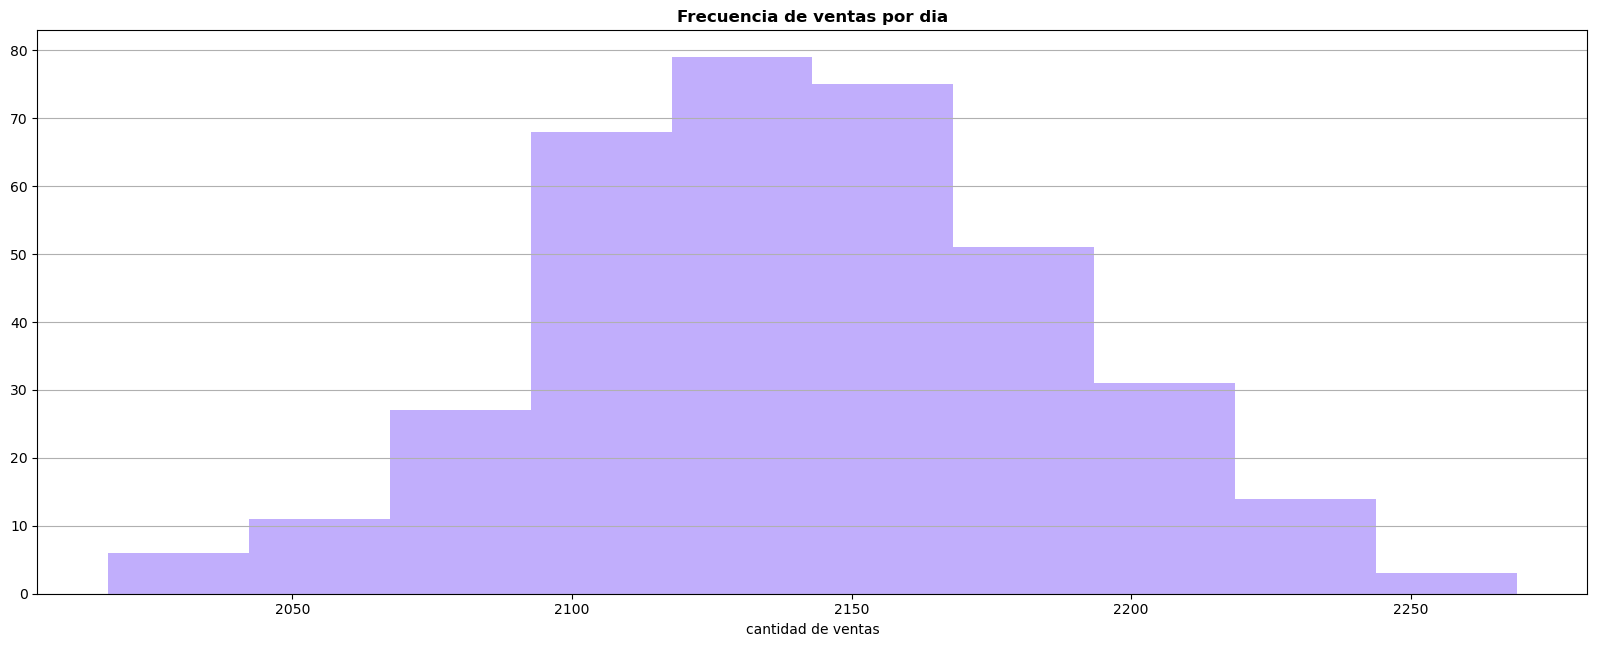

In [42]:
df_ventas = dfSales[['fecha', 'id_compra']].groupby(['fecha'], as_index=False).agg(
    ventas=pd.NamedAgg(column="id_compra", aggfunc="count")
)

fig = plt.figure(figsize=(20,60))
fig.tight_layout()

sp_primer_punto = plt.subplot(711)
sp_primer_punto.set_title('Frecuencia de ventas por dia', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_primer_punto.set_xlabel('cantidad de ventas')
plt.grid(axis = 'y')
plt.hist(df_ventas['ventas'], color='#C1AEFC') 

## 2. Gráfico lineal con monto de ventas diarias

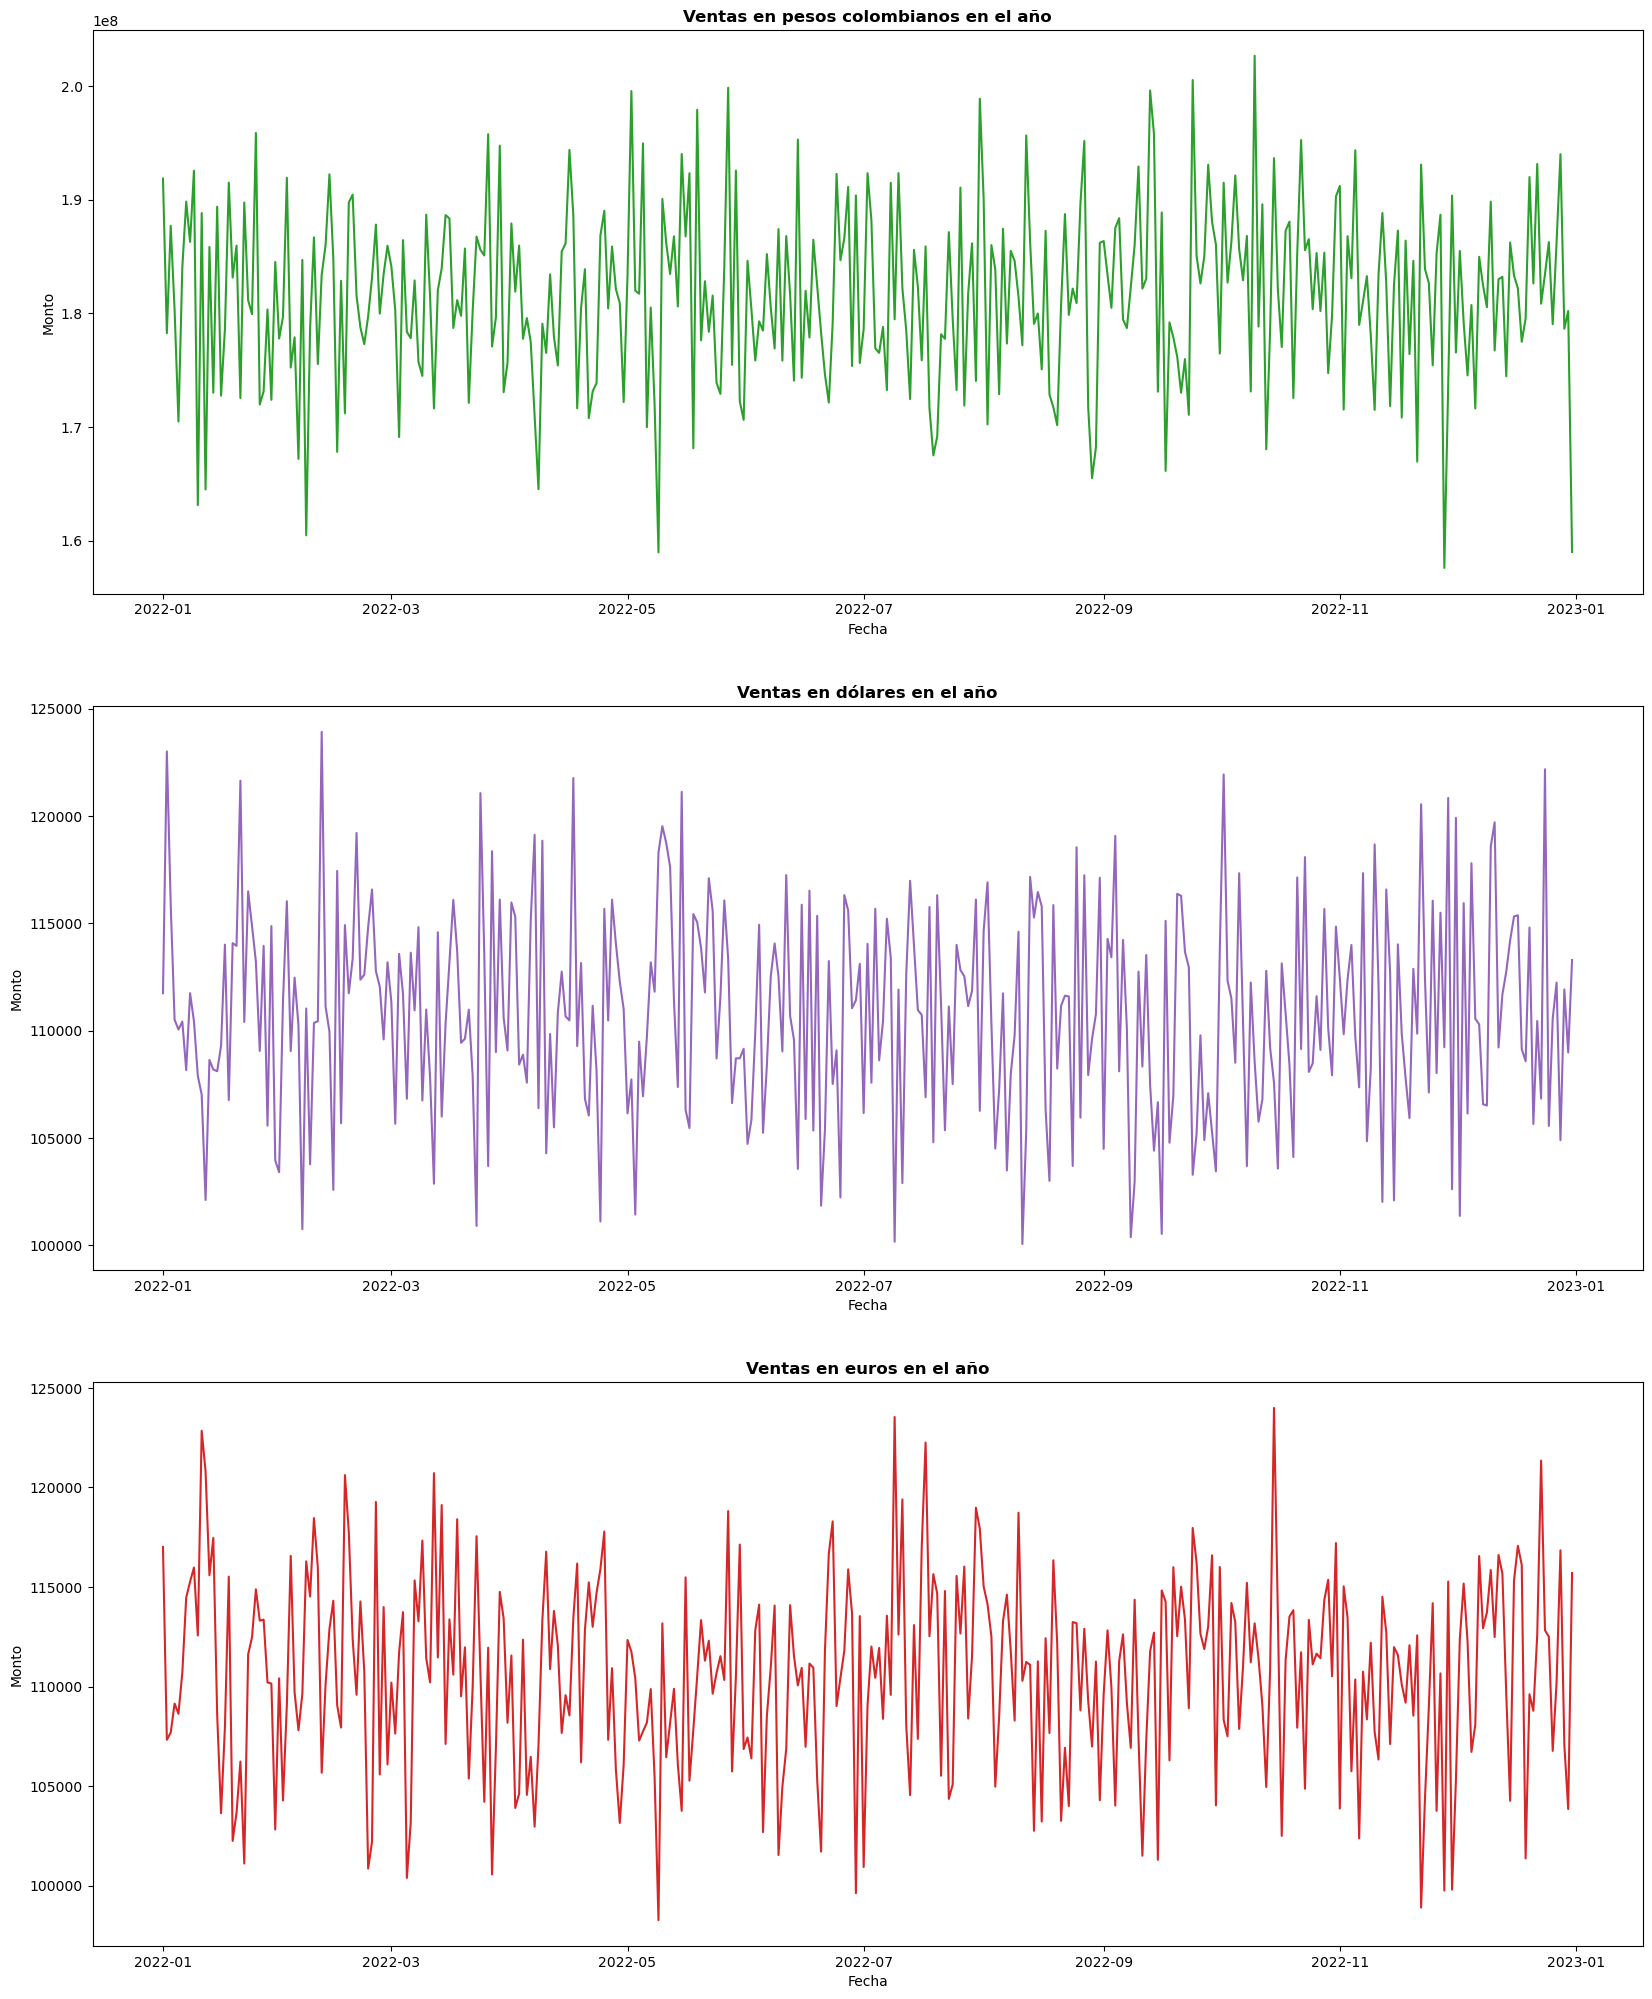

In [43]:
ventas_cop = dfSales.loc[dfSales['moneda'] == 'COP']

fig = plt.figure(figsize=(20,60))
fig.tight_layout()

monto_ventas_cop = ventas_cop[['fecha', 'monto']].groupby(['fecha'], as_index=False).agg(
    ventas=pd.NamedAgg(column="monto", aggfunc="sum")
)

ventas_usd = dfSales.loc[dfSales['moneda'] == 'USD']
monto_ventas_usd = ventas_usd[['fecha', 'monto']].groupby(['fecha'], as_index=False).agg(
    ventas=pd.NamedAgg(column="monto", aggfunc="sum")
)

ventas_eur = dfSales.loc[dfSales['moneda'] == 'EUR']
monto_ventas_eur = ventas_eur[['fecha', 'monto']].groupby(['fecha'], as_index=False).agg(
    ventas=pd.NamedAgg(column="monto", aggfunc="sum")
)

sp_segundo_punto_cop = plt.subplot(712)
sp_segundo_punto_cop.set_title('Ventas en pesos colombianos en el año', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_segundo_punto_cop.set_xlabel('Fecha')
sp_segundo_punto_cop.set_ylabel('Monto')
plt.plot(monto_ventas_cop['fecha'], monto_ventas_cop['ventas'], color = 'tab:green', label = 'COP')

sp_segundo_punto_usd = plt.subplot(713)
sp_segundo_punto_usd.set_title('Ventas en dólares en el año', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_segundo_punto_usd.set_xlabel('Fecha')
sp_segundo_punto_usd.set_ylabel('Monto')
plt.plot(monto_ventas_usd['fecha'], monto_ventas_usd['ventas'], color = 'tab:purple', label = 'USD')

sp_segundo_punto_eur = plt.subplot(714)
sp_segundo_punto_eur.set_title('Ventas en euros en el año', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_segundo_punto_eur.set_xlabel('Fecha')
sp_segundo_punto_eur.set_ylabel('Monto')
plt.plot(monto_ventas_eur['fecha'], monto_ventas_eur['ventas'], color = 'tab:red', label = 'EUR')

## 3. Gráfico barras ventas en COP

<BarContainer object of 10 artists>

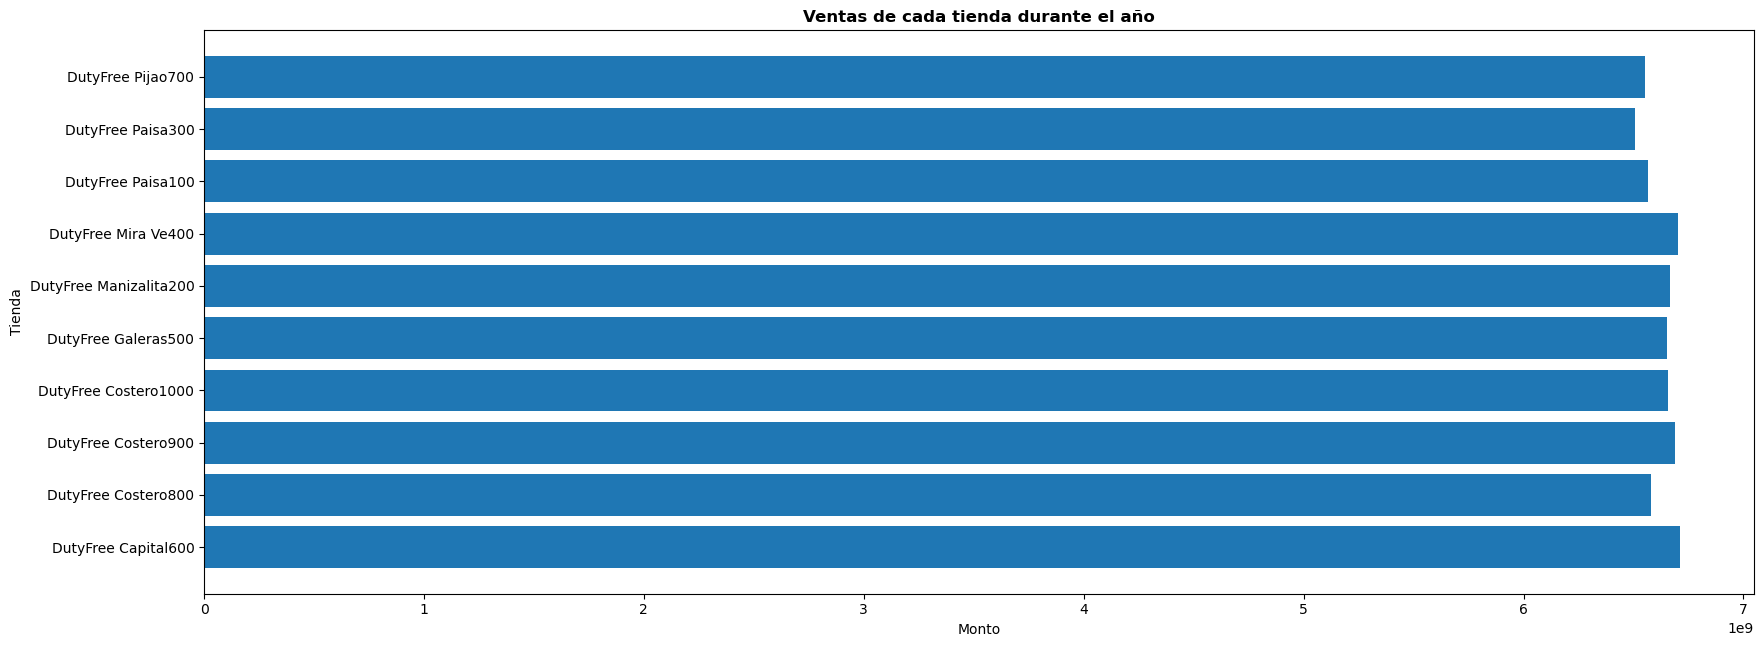

In [44]:
total_ventas_tiendas_cop = ventas_cop[['nombre_tienda', 'id_tienda', 'monto_COP']].groupby(['nombre_tienda', 'id_tienda'], as_index=False).agg(
    ventas=pd.NamedAgg(column="monto_COP", aggfunc="sum")
)

fig = plt.figure(figsize=(20,60))
fig.tight_layout()
total_ventas_tiendas_cop['tienda'] = total_ventas_tiendas_cop.apply(lambda x: x['nombre_tienda'] + str(x['id_tienda']), axis=1)

sp_tercer_punto = plt.subplot(715)
sp_tercer_punto.set_title('Ventas de cada tienda durante el año', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_tercer_punto.set_xlabel('Monto')
sp_tercer_punto.set_ylabel('Tienda')
plt.barh(total_ventas_tiendas_cop['tienda'], total_ventas_tiendas_cop['ventas'])

## 4. Un gráfico circular del monto total de ventas (en Pesos Colombianos) por zonas

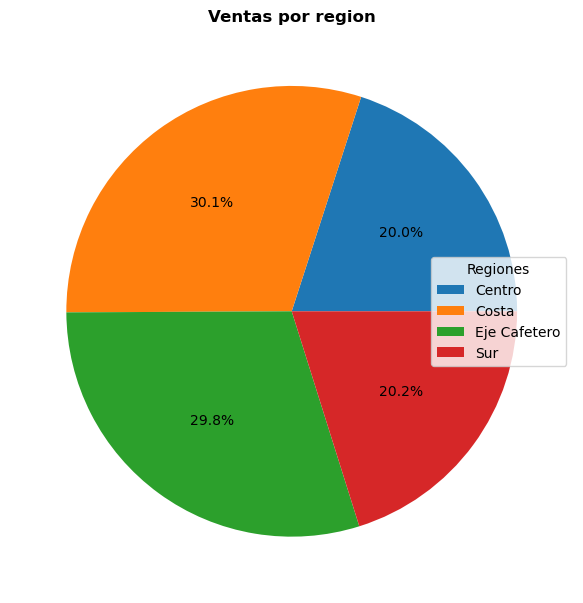

In [45]:
total_ventas_zonas_cop = ventas_cop[['region', 'monto_COP']].groupby(['region'], as_index=False).agg(
    ventas=pd.NamedAgg(column="monto_COP", aggfunc="sum")
)

fig = plt.figure(figsize=(20,60))
fig.tight_layout()

sp_cuarto_punto = plt.subplot(716)
sp_cuarto_punto.set_title('Ventas por region', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
plt.pie(total_ventas_zonas_cop['ventas'], autopct='%1.1f%%')
sp_cuarto_punto.legend(
    total_ventas_zonas_cop['region'],
    title ="Regiones",
    loc ="center right")

## Visualizaciones adicionales: Mapas

Los datos poseen latitud y longitud de cada una de las sedes de la compañía. Realice un Mapa interactivo donde coloque un marcador en cada una de las sedes y que adicional muestre:

- Nombre de la tienda.
- ID de la tienda.
- Aeropuerto y ciudad.
- Sigla del aeropuerto.
- Región.
- Cantidad de ventas realizadas.
- Suma total de las ventas (En COP).

In [46]:
# Se hace una agrupación de la información requerida para el mapa
df_mapa = dfSales.groupby(['nombre_tienda', 'id_tienda', 'aeropuerto', 'sigla', 'latitud', 'longitud', 'ciudad', 'region'], as_index=False).agg(
    total_ventas=pd.NamedAgg(column="id_compra", aggfunc="count"),
    total_pagado_cop=pd.NamedAgg(column="monto_COP", aggfunc="sum")
)
df_mapa

,nombre_tienda,id_tienda,aeropuerto,sigla,latitud,longitud,ciudad,region,total_ventas,total_pagado_cop
0,DutyFree Capital,600,El Dorado,BOG,4.70103,-74.14609,Bogota,Centro,78336,"44,352,070,054.01"
1,DutyFree Costero,800,Rafael Nunez,CTG,10.44599,-75.5164,Cartagena,Costa,77974,"44,148,993,600.91"
2,DutyFree Costero,900,Ernesto Cortissoz,BAQ,10.88655,-74.77633,Barranquilla,Costa,78789,"44,427,763,687.46"
3,DutyFree Costero,1000,Simon Bolivar,SMR,11.11736,-74.23283,Santa Marta,Costa,78507,"44,544,026,348.1"
4,DutyFree Galeras,500,Antonio Narino,PSO,1.39556,-77.28974,Pasto,Sur,78188,"44,244,696,270.17"
5,DutyFree Manizalita,200,La Nubia,MZL,5.02909,-75.4692,Manizales,Eje Cafetero,78018,"44,150,366,318.86"
6,DutyFree Mira Ve,400,Alfonso Bonilla Aragon,CLO,3.53491,-76.38733,Palmira,Sur,78393,"44,396,190,098.28"
7,DutyFree Paisa,100,Jose Maria Cordoba,MDE,6.1716,-75.42775,Rionegro,Eje Cafetero,77949,"44,345,405,066.2"
8,DutyFree Paisa,300,Matecaña,PEI,4.8158,-75.73637,Pereira,Eje Cafetero,77411,"43,863,357,128.91"
9,DutyFree Pijao,700,Perales,IBE,4.42512,-75.14172,Ibague,Centro,78067,"44,172,661,173.07"


In [47]:
import folium

mapa = folium.Map(location=[4.178462, -73.186905], zoom_start=5)

for i in range(0, 10):
    tienda = df_mapa.iloc[i,:]
    popup = folium.Popup("<b>Tienda: </b>" + tienda.nombre_tienda + "<br>" + 
                         "<b>id: </b>" + str(tienda.id_tienda) + "<br>" + 
                         "<b>Aeropuerto: </b>" + tienda.aeropuerto + ", "+ tienda.ciudad +"<br>" + 
                         "<b>Sigla: </b>" + tienda.sigla + "<br>" + 
                         "<b>Region: </b>" + tienda.region + "<br>" + 
                         "<b>Total de ventas: </b>" + str(tienda.total_ventas) + "<br>" + 
                         "<b>Suma total de ventas: </b>" + str(tienda.total_pagado_cop.round()) + " COP" , min_width=150, max_width=220)
    tooltip=tienda.nombre_tienda + ", " + tienda.aeropuerto
    folium.Marker([tienda.latitud, tienda.longitud], 
                  popup=popup,
                 icon=folium.Icon(color="red", icon="shop", prefix="fa"),
                 tooltip=tooltip).add_to(mapa)
mapa